#### ELITE DATA SCIENCE CAPSTONE
#### Cluster Analysis

# Segmenting Mall Customers

In [1]:
''' The Mall customers dataset contains information about people visiting a mall. The dataset contains the columns (1) gender, 
(2) customer id, (3) age,  (4) annual income, and (5) spending score. This notebook aims to segment the customers based on 
their the relevant features that would be detected. Customer segmentation is useful in marketing because it helps divide 
customers based on the similarities of the clusters. '''

__author__ = 'Noel Joseph Padilla'
__email__ = 'nino.padilla87@gmail.com'

## <span style="color:RoyalBlue"> I. Import Libraries </span>

Import Relevant Libraries to be used for analysis.

In [2]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# Scikit-Learn's KMeans algorithm
from sklearn.cluster import KMeans

## <span style="color:RoyalBlue"> II. Exploratory Data Analysis </span>

In [3]:
# Load our dataset
df = pd.read_csv('mall_customers.csv')

In [4]:
# Check the first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Check column names of dataset
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

**We have five (5) columns on this dataset:**

(1) CustomerID - a unique ID/number assigned to a customer.

(2) Gender - refers to the gender of the Customer.

(3) Age - refers to the age of the customer.

(4) Annual Income - pertains to the annual income ofthe customer in USD ($).

(5) Spending Score - pertains to the score assigned by the mall based on customer behavior and spending nature.

In [6]:
# Check the size of our data
df.shape

(200, 5)

In [7]:
# Rename column names more appropriately 
df = df.rename(columns={'Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)': 'Spending_score'})

In [8]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_income   200 non-null    int64 
 4   Spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We probably would not be using the CustomerID column since this feature does not tell us anything relevant to the customer. It is simply a reference number given to an individual customer. On the other hand, since the Gender column is an object, it would be best to convert it later to an int64 format so that it could be recognized by our clustering algorithm. Finally, the Age, Annual_income and Spending_score are already encoded according to the format which would be recognized by our algorithm. 

In [9]:
# Check summary of our data
df.describe()

,CustomerID,Age,Annual_income,Spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# Check sum of null values
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_income     0
Spending_score    0
dtype: int64

It is good to see that there are no missing values from the acquired dataset. With this, there is no need to fill in or impute missing values. 

In [11]:
# Drop duplicates if there are any
df.drop_duplicates()

,CustomerID,Gender,Age,Annual_income,Spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
# Replace categorical values with numerical values
df['Gender'].replace(['Female','Male'], [0,1],inplace=True)

In [13]:
# Check if Gender Values have been converted to 0, 1
df['Gender'].unique()

array([1, 0], dtype=int64)

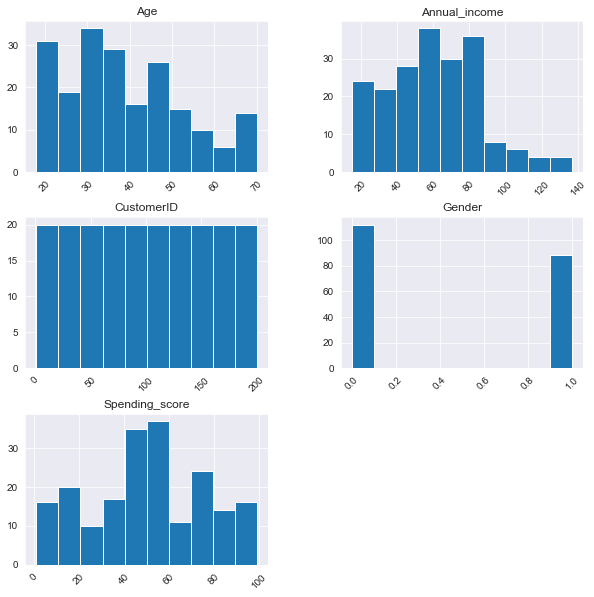

In [14]:
# Check Distribution Values of Dataset  
df.hist(figsize=(10,10), xrot=45)
plt.show()

In [15]:
# Check correlation of variables
df.corr()

,CustomerID,Gender,Age,Annual_income,Spending_score
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual_income,0.977548,0.056410,-0.012398,1.000000,0.009903
Spending_score,0.013835,-0.058109,-0.327227,0.009903,1.000000


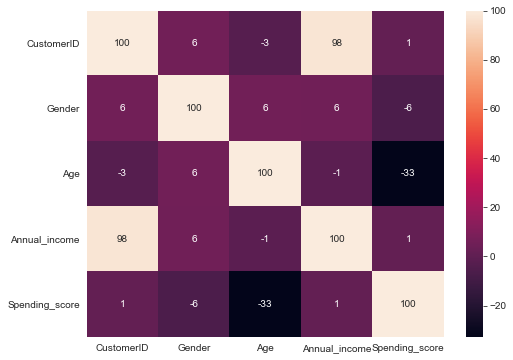

In [16]:
# Visualize a Correlation Heatmap
correlations = df.corr()

plt.figure(figsize=(8,6))

sns.heatmap(correlations * 100,
            annot=True,
            fmt='.0f')

plt.show()

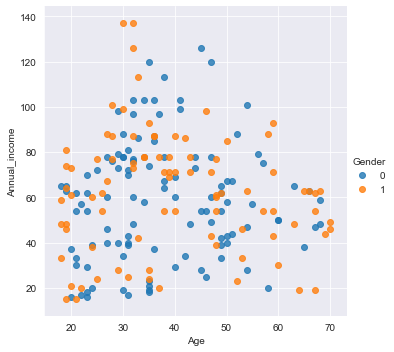

In [17]:
# Visualize Relationship between Annual_income and Age
sns.lmplot(x='Age', y='Annual_income', data=df, hue='Gender', fit_reg=False)

From this graph, we can see how people in their thirties up to their fifties tend to earn more annually compared to those who are younger. This might be because individuals in their thirties to fifties get better jobs or higher positions because of their experience and skillset. Male individuals in their thirties tend to earn more than female individuals in the same age range. Conversely, female individuals tend to earn more than male individuals in their forties and fifties.

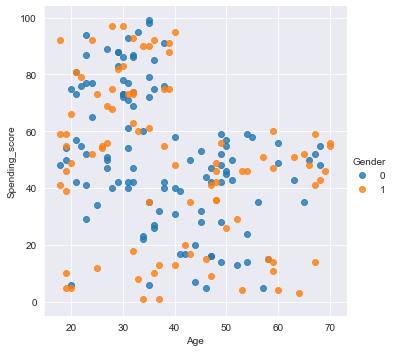

In [18]:
# Visualize Relationship betweeen Spending Score and Age
sns.lmplot(x='Age', y='Spending_score', data=df, hue='Gender', fit_reg=False)

Ironically, younger people (with lesser income) tend to spend way more than older people. This might be because most advertisements and products are tailored to people of this age range.

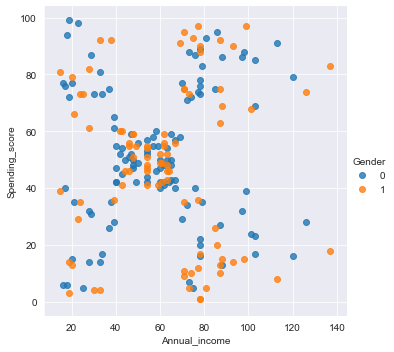

In [19]:
# Visualize Relationship between Spending_score and  Annual_income
sns.lmplot(x='Annual_income', y='Spending_score', data=df, hue='Gender', fit_reg=False)

The findings on this graph are quite varied. Having a higher income does not always correlate to having a higher spending score. This is manifested on those with individuals who have the highest (100k and above) and lowest (20k-40k) annual incomes. Somehow, those whose annual income is within the 60k-80k range appear to have the most decent credit scores.

## <span style="color:RoyalBlue"> III. Clustering Algorithm </span>

In [20]:
X = df.loc[:,["Age", "Annual_income", "Spending_score"]]

In our Clustering process, we would no longer be inputting the gender variable anymore. Based on the spending activity between male and female individuals, there does not seem to be a great difference between the two. Intuitively, stores in general do not appear to target a specific gender anymore. Almost every store includes products which can be used by either male or female.

Most importantly, we do not want any uncessesary variables to interfere with the accuary of the unsupervised learning process.

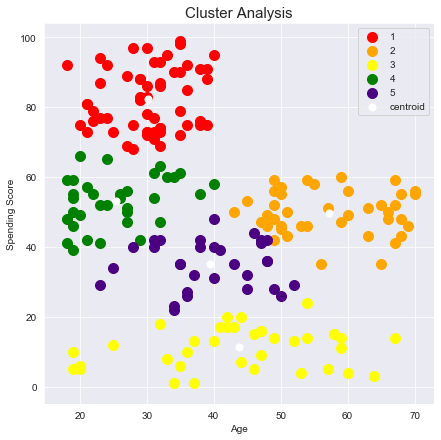

In [21]:
# Cluster Spending Score & Age

x = df.iloc[:, [2, 4]].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

fig = plt.figure(figsize=(7,7))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'orange', label = '2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'yellow', label = '3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'green', label = '4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'indigo', label = '5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'white' , label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Cluster Analysis', fontsize = 15)
plt.legend()
plt.show()

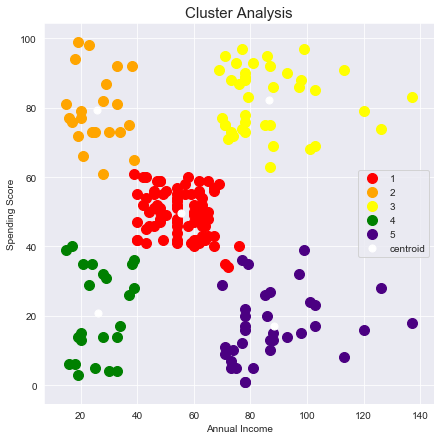

In [22]:
# Cluster Spending Score & Annual Income  

x = df.iloc[:, [3, 4]].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

fig = plt.figure(figsize=(7,7))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'orange', label = '2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'yellow', label = '3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'green', label = '4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'indigo', label = '5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'white' , label = 'centroid')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Cluster Analysis', fontsize = 15)
plt.legend()
plt.show()

**Let us break down our findings on the five clusters we have:**

**(1) Average** - Cluster 1 is comprised of individuals who have a fairly decent annual income (40k-60k) and a decent spending score (40-60). Because of this, we would name this cluster as "Average".

**(2) Prodigal** - Cluster 2 is comprised of individuals who have a low annual income (mostly 20k) but a large spending score. Because of high spending activities but low annual income, we decided to label this cluster a "Prodigal". 

**(3) Wealthy** - Cluster 3 is comprised of individuals who have a large annual income (80k to 140k) and a large spending score. As we would expect high earning individuals to have the largest spending scores, we called this cluster "Wealthy".

**(4) Little** - Cluster 4 is comprised of individuals who have a low annual income (20k) and a low spending score. Straightforwardly, we call this cluster "Little"

**(5) Thrifty** - Cluster 5 is comprised of individuals who have a large annual income (80k to 140k) and a low spending score. With this, we call them "Thrifty". 